# Support Vector Machine (without kernel) for classification

In the following we apply a simple SVM algorithm to two classification problems (success/failure and malign/benign breat cancer). The SVM algorithm tries to construct the ideal decision/separation hyperplane for a data set only from a small amount of close data points from different categories. The C parameter allows to give emphasis or reduce emphasis of singe data points such that the form of the decision hyperplane can be modulated. The SVM algorithm classifies data using a linear function which, however, is only optimal if the underlying classification problem is linear. Otherwise, a non-linear extension may be yielded using kernel functions. For more details on SVMs we refer to https://en.wikipedia.org/wiki/Support-vector_machine, https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72, https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 and https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

## Case 1: simple failure/success classification

In [27]:
#define data frame
df = pd.read_csv("classification.csv")

#to trop columns 
#df = df.drop("name of column", axis = 1)

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [28]:
#define variables and proceed with train/test split
X = df[["age", "interest"]].values
Y = df["success"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.svm import SVC

model = SVC(kernel = "linear")
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.88


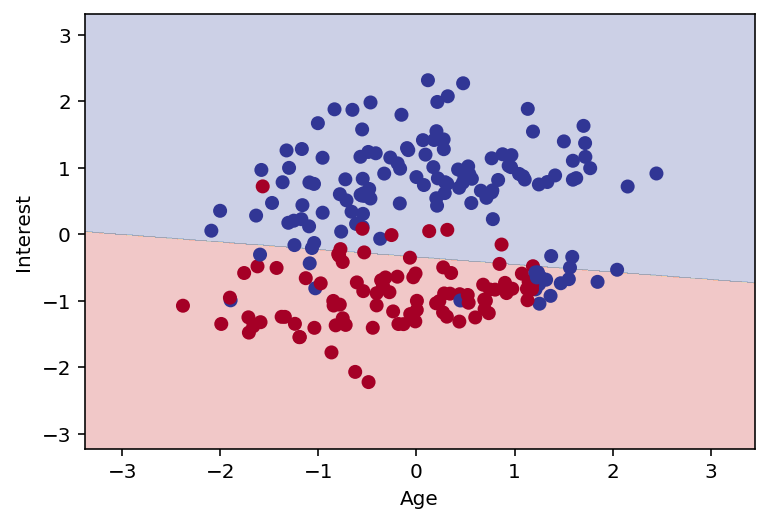

In [30]:
#visualizing the results for training and test sets
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

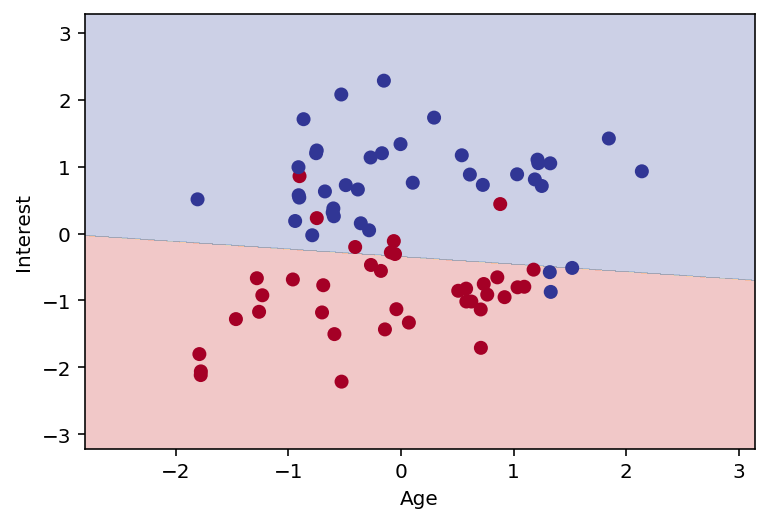

In [31]:
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

Comment: Notice that plotting results with transition regions is not possible here, as the output of the algorithm is not probability-valued!

In the following we would like to tweak our model using the C-parameter.

In [47]:
model = SVC(kernel = "linear", C = 1)
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))

0.8828828828828829


In [48]:
print(model.score(X_test, Y_test))

0.88


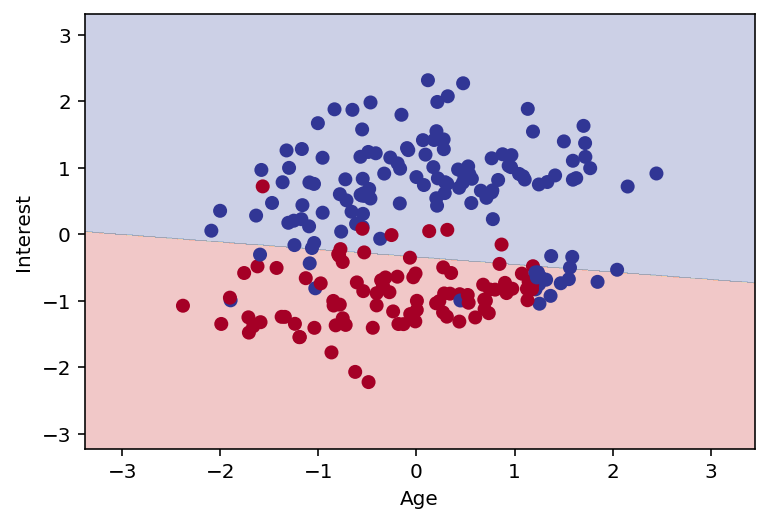

In [49]:
#visualizing the results for training and test sets
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

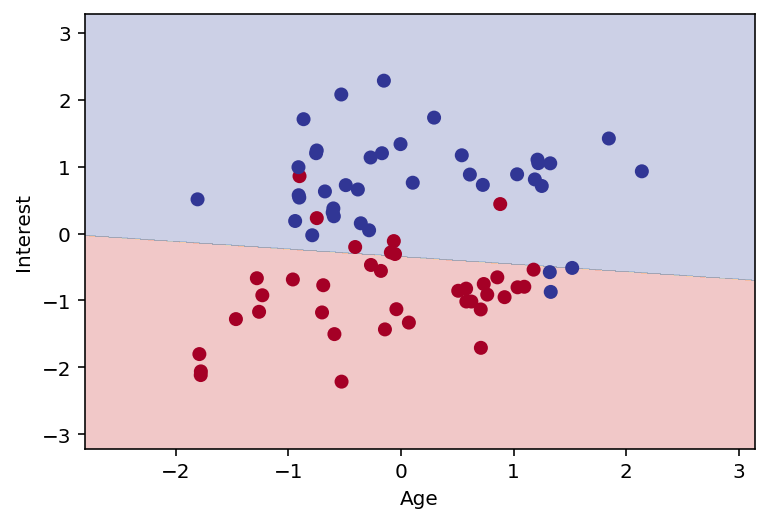

In [50]:
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

Notice that a large C might lead to overfitting as it assings a high weight to all data points. A too small C might lead to underfitting but will get the general trends of the data set better.

## Case 2: Breast cancer

In [51]:
#define data frame
df = pd.read_csv("cancer.csv")
df = df.drop("id", axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
df.shape

(569, 31)

In [53]:
#define variables by taking for X all columns
X = df.drop("diagnosis", axis = 1).values
Y = df["diagnosis"].values #single brackets (!) needed for classification machine learling processing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
model = SVC(kernel = "linear")
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.972027972027972


Comment: Interestingly, this result produced with a naive SVM is better than that of the logistic regression.

In the following we would like to tweak our analysis using the C parameter.

In [55]:
model = SVC(kernel = "linear", C = 100)
model.fit(X_train, Y_train)

print(model.score(X_train, Y_train))

1.0


In [56]:
print(model.score(X_test, Y_test))

0.9440559440559441


Notice that a large C might lead to overfitting as it assings a high weight to all data points. A too small C might lead to underfitting but will get the general trends of the data set better.